### Netflix eploratory data analysis

#### Dataset available at: *https://www.kaggle.com/shivamb/netflix-shows*

##### Import the needed libraries

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

#### Import the dataset

In [2]:
df=pd.read_csv('c:/users/daniel/documents/coursera/data files/netflix_titles.csv')
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


#### Check the properties of the Dataset

In [3]:
df.shape

(8807, 12)

In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

##### Change the data in the date_added columns to date format

In [5]:
df['date_added']=pd.to_datetime(df['date_added'])

In [6]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


##### Check the number of null values in the Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [100]:
(df.isnull().sum()/len(df))*100

show_id                0.000000
type                   0.000000
title                  0.000000
director              29.908028
cast                   9.367549
country                9.435676
date_added             0.113546
release_year           0.000000
rating                 0.045418
duration               0.034064
listed_in              0.000000
description            0.000000
data_addded)month      0.113546
data_addded_month      0.113546
quarter_date_added     0.113546
date_addded_month      0.113546
date_added_month       0.113546
date_added_date        0.113546
date_added_day         0.113546
dtype: float64

In [10]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


### Date analysis

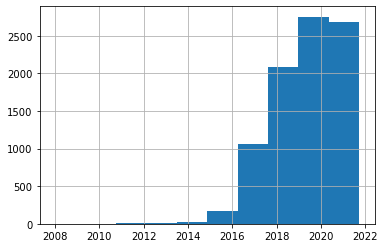

In [11]:
df['date_added'].hist()
plt.show()

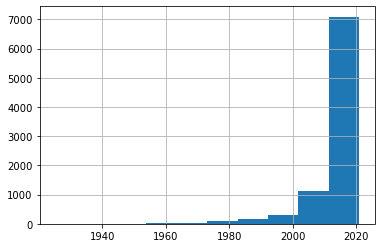

In [12]:
df['release_year'].hist()
plt.show()

In [15]:
px.histogram(df, x='release_year')

In [25]:
px.histogram(df, x='date_added')

##### Extract month from date_added

In [56]:
df['date_added_month']=df['date_added'].dt.month

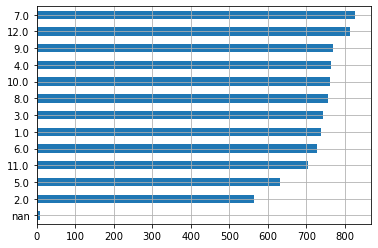

In [57]:
df['date_added_month'].value_counts(dropna=False,ascending=True).plot(kind='barh')

plt.grid()
plt.show()

##### Extract day from month_added

In [63]:
df['date_added_day']=df['date_added'].dt.day

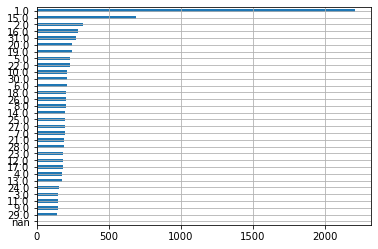

In [68]:
df['date_added_day'].value_counts(dropna=False, ascending=True).plot(kind='barh')
plt.grid()
plt.show()

In [69]:
px.histogram(df, x='date_added_day')

In [73]:
px.histogram(df, x='date_added_day', color='type')

##### Extract quarter from date_added

In [34]:
df['quarter_date_added']=df['date_added'].dt.quarter

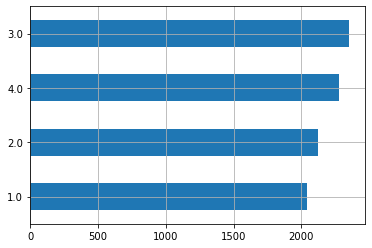

In [45]:
df['quarter_date_added'].value_counts(ascending=True).plot(kind='barh')

plt.grid()
plt.show()

In [72]:
px.histogram(df, x='quarter_date_added', color='type')

##### Let us check the films that were released in the late 90s

In [17]:
late90s_films= df.loc[df['release_year']<1950]
late90s_films.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1331,s1332,TV Show,Five Came Back: The Reference Films,NaN,NaN,United States,2021-02-09,1945,TV-MA,1 Season,TV Shows,This collection includes 12 World War II-era p...
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
7219,s7220,Movie,Know Your Enemy - Japan,"Frank Capra, Joris Ivens","Walter Huston, Dana Andrews",United States,2017-03-31,1945,TV-14,63 min,"Classic Movies, Documentaries",Though culturally insensitive by modern standa...
7294,s7295,Movie,Let There Be Light,John Huston,Walter Huston,United States,2017-03-31,1946,TV-PG,58 min,"Classic Movies, Documentaries",Some returning combat veterans suffer scars th...


In [18]:
len(late90s_films)

16

In [21]:
late90s_films['release_year'].value_counts(dropna=False)

1945    4
1944    3
1943    3
1946    2
1942    2
1925    1
1947    1
Name: release_year, dtype: int64

In [22]:
late90s_films['country'].value_counts(dropna=False)

United States                    14
NaN                               1
United States, United Kingdom     1
Name: country, dtype: int64

In [93]:
late90s_films.loc[late90s_films['release_year']==1925]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


### String column analysis

In [75]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'data_addded)month', 'data_addded_month', 'quarter_date_added',
       'date_addded_month', 'date_added_month', 'date_added_date',
       'date_added_day'],
      dtype='object')

In [74]:
df['type'].value_counts(dropna=False)

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [76]:
df['rating'].value_counts(dropna=False)

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [77]:
df['country'].value_counts(dropna=False)

United States                             2818
India                                      972
NaN                                        831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

#### Extract Nigerian films

In [98]:
nigeria_films=df.loc[df['country'].str.lower()=='nigeria']

print('Number of Nigeria films:', len(nigeria_films))
nigeria_films.head(3)

Number of Nigeria films: 95


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_addded)month,data_addded_month,quarter_date_added,date_addded_month,date_added_month,date_added_date,date_added_day
49,s50,TV Show,Castle and Castle,NaN,"Richard Mofe-Damijo, Dakore Akande, Bimbo Manu...",Nigeria,2021-09-15,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas","A pair of high-powered, successful lawyers fin...",9.0,9.0,3.0,9.0,9.0,2021-09-15,15.0
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,2021-09-14,2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,9.0,9.0,3.0,9.0,9.0,2021-09-14,14.0
84,s85,Movie,Omo Ghetto: the Saga,"JJC Skillz, Funke Akindele","Funke Akindele, Ayo Makun, Chioma Chukwuka Akp...",Nigeria,2021-09-10,2020,TV-MA,147 min,"Action & Adventure, Comedies, Dramas",Twins are reunited as a good-hearted female ga...,9.0,9.0,3.0,9.0,9.0,2021-09-10,10.0


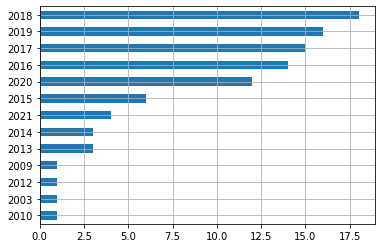

In [95]:
nigeria_films['release_year'].value_counts(ascending=True).plot(kind='barh')

plt.grid()
plt.show()

In [91]:
px.histogram(nigeria_films, x='date_added',color='type')

In [92]:
nigeria_films['type'].value_counts(dropna=False)

Movie      86
TV Show     9
Name: type, dtype: int64